## FastText CBOW



In [ ]:
import pandas as pd
import numpy as np
import gensim
import utils
import warnings
%matplotlib inline
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
import seaborn as sns
import xgboost as xgb
import multiprocessing
from utils import clean_dataset
from gensim.models import FastText
from lightgbm import LGBMRegressor
from utils import clean_dataset
from sklearn import preprocessing
from gensim.models import Doc2Vec
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from collections import defaultdict  # For word frequency
from sklearn.model_selection import train_test_split
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from utils import hyperparameterTuning_RandomForest
from utils import hyperparameterTuning_XGBoost
from utils import hyperparameterTuning_MLP
from utils import plot_feature_importance
from utils import featureScore
from utils import folderPath
from utils import metrics
from utils import removeColumnContainString
from utils import Feature_Extraction
from utils import Normalizing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path='/content/drive/MyDrive/NLP/'
df=pd.read_csv(path + '3.csv')

In [ ]:
df

,Unnamed: 0,caption,following,likes,posts_count,followers,caption_length,biography_length,po_co,pof,...,TextBlob_Subjectivity,TextBlob_Polarity,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count,hashtag_popularity
0,0,last pizza sunday arch today pizzas available ...,352.0,29.0,280.0,8702.0,121,149.0,280.0,0.793201,...,0.233333,0.200000,NaN,0,NaN,0,"['🍕', '🍕', '🍕', '🥐', '🥐', '🥐']","'pizza', 'pizza', 'pizza', 'croissant', 'crois...",6,0.000000
1,1,new cakes counters,352.0,44.0,280.0,8702.0,28,149.0,280.0,0.793201,...,0.454545,0.136364,NaN,0,NaN,0,"['😋', '😋']","'face savoring food', 'face savoring food'",2,0.000000
2,2,opening times half term hi everyone wanted let...,352.0,209.0,280.0,8702.0,259,149.0,28.0,0.793201,...,0.147222,-0.080556,NaN,0,NaN,0,"['🔺', '🔺']","'red triangle pointed up', 'red triangle point...",2,0.000000
3,3,new addition selection sandwiches roasted aube...,352.0,95.0,280.0,8702.0,138,149.0,70.0,0.793201,...,0.477273,0.085227,NaN,0,NaN,0,[],NaN,0,0.000000
4,4,currently closed move new exciting space aroun...,352.0,101.0,280.0,8702.0,256,149.0,40.0,0.793201,...,0.444719,0.174416,"'#yeastbakery', '#eastlondon', '#eastlondonfoo...",4,NaN,0,[],NaN,0,18028.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,88509,day 2 christmas ochure tour day one ochure tour #,579.0,10.0,1863.0,2321.0,278,150.0,931.5,3.212069,...,0.000000,0.000000,"'#sandysfishmongers', '#butcher', '#fishmonger...",20,NaN,0,[],NaN,0,10095.150000
88510,88510,NaN,579.0,50.0,1863.0,2321.0,35,150.0,1863.0,3.212069,...,0.000000,0.000000,"'#armisticeday', '#poppy', '#lestwerespect'",3,NaN,0,[],NaN,0,4333.666667
88511,88511,theres one turkey best place buy sandys make c...,579.0,8.0,1863.0,2321.0,266,150.0,1863.0,3.212069,...,0.525000,0.500000,"'#notjustafishmonger', '#butcher', '#fishmonge...",9,NaN,0,[],NaN,0,5195.444444
88512,88512,day one ochure tour #,579.0,9.0,1863.0,2321.0,241,150.0,1863.0,3.212069,...,0.000000,0.000000,"'#sandysfishmongers', '#butcher', '#fishmonger...",19,NaN,0,[],NaN,0,10504.315789


In [ ]:
df.drop(['Unnamed: 0'], axis = 1,inplace=True)

In [ ]:
tokenized_caption = df['caption'].apply(lambda x: str(x).split()) # tokenizing
modelFastTextCBOWCaption = FastText(tokenized_caption, 
                     size=100, # desired no. of features/independent variables
                     window=2,  # context window size
                     min_count=2, # Ignores all words with total frequency lower than 2.  
                     workers=32, # no.of cores
                     hs = 0,
                     negative = 10, # for negative sampling
                     sg=0  # 0 for CBOW model
                     )

modelFastTextCBOWCaption.build_vocab(tokenized_caption, update=True)
modelFastTextCBOWCaption.train(tokenized_caption, total_examples= len(tokenized_caption), epochs=20)

In [ ]:
modelFastTextCBOWCaption.wv.most_similar("Gastroenteritis")

[('osteoarthritis', 0.7038353681564331),
 ('arthritis', 0.6732624769210815),
 ('vicente', 0.6615971326828003),
 ('gastrointestinal', 0.6522524356842041),
 ('lantern', 0.6395212411880493),
 ('eminente', 0.6334818601608276),
 ('colitis', 0.6323496699333191),
 ('centering', 0.6322340965270996),
 ('vincent', 0.6223417520523071),
 ('ancient', 0.6213014721870422)]

In [ ]:
modelFastTextCBOWCaption.wv.most_similar("pizza")

[('pizzazz', 0.9494413137435913),
 ('pizza995', 0.9389921426773071),
 ('pizzaiolo', 0.8886144161224365),
 ('pizzawe', 0.8451032638549805),
 ('atpizzatogo', 0.8391474485397339),
 ('pizzas', 0.8285229206085205),
 ('pizzavegan', 0.8250494003295898),
 ('pizzaioli', 0.8057912588119507),
 ('fizza', 0.8003872632980347),
 ('pizzasour', 0.7716930508613586)]

In [ ]:
# modelFastTextSkipGramCaption.save(path+ "Save Models\\200_fastText_Skipgram_Caption.model")

In [ ]:
def word_vector(tokens, size,model):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_caption), 100)) 
for i in range(len(tokenized_caption)):
    wordvec_arrays[i,:] = word_vector(tokenized_caption[i], 100,modelFastTextCBOWCaption)
wordvec_caption = pd.DataFrame(wordvec_arrays)
wordvec_caption.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(88514, 100)

## Hashtags

In [ ]:
tokenized_hastags = df['hashtags'].apply(lambda x: str(x).split()) # tokenizing
modelFastTextCBOWHastags = FastText(tokenized_hastags, 
                     size=100, # desired no. of features/independent variables
                     window=2,  # context window size
                     min_count=2, # Ignores all words with total frequency lower than 2.  
                     workers=32, # no.of cores
                     hs = 0,
                     negative = 10, # for negative sampling
                     sg=0  # 0 for CBOW model
                     )

modelFastTextCBOWHastags.build_vocab(tokenized_hastags, update=True)
modelFastTextCBOWHastags.train(tokenized_hastags, total_examples= len(tokenized_hastags), epochs=20)

In [ ]:
modelFastTextCBOWHastags.wv.most_similar("Gastroenteritis")

[("'#quintessentiallybritish'", 0.6822525262832642),
 ("'#greatbritishmenu'", 0.6638871431350708),
 ("'#greatbritishmenu',", 0.6567832827568054),
 ("'#quintessentiallybritish',", 0.6366398930549622),
 ("'#relaischateaux'", 0.6047451496124268),
 ("'#relaischateaux',", 0.6023094058036804),
 ("'#greatbritishbakeoff',", 0.5862195491790771),
 ("'#luxuryinterior',", 0.5794373750686646),
 ("'#asenseofplace'", 0.5788466334342957),
 ("'#interiordesign'", 0.5722983479499817)]

In [ ]:
# modelFastTextCBOWHastags.save(path+ "Save Models\\200_fastText_Skipgram_Hashtags.model")

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_hastags), 100)) 
for i in range(len(tokenized_hastags)):
    wordvec_arrays[i,:] = word_vector(tokenized_hastags[i], 100,modelFastTextCBOWHastags)
wordvec_Hashtag = pd.DataFrame(wordvec_arrays)
wordvec_Hashtag.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(88514, 100)

### emojiText

In [ ]:
tokenized_emojiText = df['hashtags'].apply(lambda x: str(x).split()) # tokenizing
modelFastTextCBOWEmojiText = FastText(tokenized_emojiText, 
                     size=100, # desired no. of features/independent variables
                     window=2,  # context window size
                     min_count=2, # Ignores all words with total frequency lower than 2.  
                     workers=32, # no.of cores
                     hs = 0,
                     negative = 10, # for negative sampling
                     sg=0  # 0 for CBOW model
                     )

modelFastTextCBOWEmojiText.build_vocab(tokenized_emojiText, update=True)
modelFastTextCBOWEmojiText.train(tokenized_emojiText, total_examples= len(tokenized_emojiText), epochs=20)

In [ ]:
modelFastTextCBOWHastags.wv.most_similar("Gastroenteritis")

[("'#quintessentiallybritish'", 0.6822525262832642),
 ("'#greatbritishmenu'", 0.6638871431350708),
 ("'#greatbritishmenu',", 0.6567832827568054),
 ("'#quintessentiallybritish',", 0.6366398930549622),
 ("'#relaischateaux'", 0.6047451496124268),
 ("'#relaischateaux',", 0.6023094058036804),
 ("'#greatbritishbakeoff',", 0.5862195491790771),
 ("'#luxuryinterior',", 0.5794373750686646),
 ("'#asenseofplace'", 0.5788466334342957),
 ("'#interiordesign'", 0.5722983479499817)]

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_emojiText), 100)) 
for i in range(len(tokenized_emojiText)):
    wordvec_arrays[i,:] = word_vector(tokenized_emojiText[i], 100,modelFastTextCBOWEmojiText)
wordvec_emojiText = pd.DataFrame(wordvec_arrays)
wordvec_emojiText.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(88514, 100)

## mentions

In [ ]:
tokenized_mentions = df['mentions'].apply(lambda x: str(x).split()) # tokenizing
modelFastTextCBOWMentions = FastText(tokenized_mentions, 
                     size=100, # desired no. of features/independent variables
                     window=2,  # context window size
                     min_count=2, # Ignores all words with total frequency lower than 2.  
                     workers=32, # no.of cores
                     hs = 0,
                     negative = 10, # for negative sampling
                     sg=0  # 0 for CBOW model
                     )

modelFastTextCBOWMentions.build_vocab(tokenized_mentions, update=True)
modelFastTextCBOWMentions.train(tokenized_mentions, total_examples= len(tokenized_mentions), epochs=20)

In [ ]:
modelFastTextCBOWMentions.wv.most_similar("Gastroenteritis")

[("'@cr_uk'", 0.9842029213905334),
 ("'@cr_uk',", 0.9825801849365234),
 ("'@kaleidoscope_eyes_liverpool'", 0.9818048477172852),
 ("'@crisis_uk',", 0.9814263582229614),
 ("'@civerinos'", 0.9813768863677979),
 ("'@well_liverpool'", 0.9808144569396973),
 ("'@creativityisntdead'", 0.9806978702545166),
 ("'@peakperformanceliverpool'", 0.9799338579177856),
 ("'@kaleidoscope_eyes_liverpool',", 0.9799215793609619),
 ("'@colinianross'", 0.9797123670578003)]

In [ ]:
# modelFastTextCBOWMentions.save(path+ "Save Models\\200_fastText_Skipgram_Hashtags.model")

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_mentions), 100)) 
for i in range(len(tokenized_mentions)):
    wordvec_arrays[i,:] = word_vector(tokenized_mentions[i], 100,modelFastTextCBOWMentions)
wordvec_Mentions = pd.DataFrame(wordvec_arrays)
wordvec_Mentions.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(88514, 100)

In [ ]:
fastText_Df = pd.DataFrame(np.hstack((wordvec_caption,wordvec_Hashtag,wordvec_emojiText,wordvec_Mentions, df)))

In [ ]:
fastText_Df

,0,1,2,3,4,5,6,7,8,9,...,435,436,437,438,439,440,441,442,443,444
0,0.598463,-0.502641,-0.746709,0.431027,0.533412,-0.763423,0.679987,-1.243646,-0.502912,-1.765027,...,0.233333,0.2,NaN,0,NaN,0,"['🍕', '🍕', '🍕', '🥐', '🥐', '🥐']","'pizza', 'pizza', 'pizza', 'croissant', 'crois...",6,0.0
1,-0.380943,-0.533972,0.325062,1.083046,1.286969,-0.806922,0.082971,0.422084,-1.197619,-2.412049,...,0.454545,0.136364,NaN,0,NaN,0,"['😋', '😋']","'face savoring food', 'face savoring food'",2,0.0
2,-0.413083,-0.021756,-0.520803,0.355328,0.491074,-1.816014,-0.020738,-0.509089,-0.419668,-1.307878,...,0.147222,-0.080556,NaN,0,NaN,0,"['🔺', '🔺']","'red triangle pointed up', 'red triangle point...",2,0.0
3,1.158988,0.08673,-0.226373,1.162798,0.373344,0.297344,0.039494,-0.026774,-0.670001,-1.005657,...,0.477273,0.085227,NaN,0,NaN,0,[],NaN,0,0.0
4,-0.447381,-0.547444,-0.971033,-0.328488,0.495377,-1.819103,-0.405452,-0.363056,-0.4891,-0.698876,...,0.444719,0.174416,"'#yeastbakery', '#eastlondon', '#eastlondonfoo...",4,NaN,0,[],NaN,0,18028.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,0.570253,-1.280692,0.140445,0.610093,1.34582,-0.178873,0.983048,0.046627,-1.746218,-0.068173,...,0.0,0.0,"'#sandysfishmongers', '#butcher', '#fishmonger...",20,NaN,0,[],NaN,0,10095.15
88510,2.136204,1.261176,2.598177,0.394218,-0.183632,2.493182,-0.22887,0.272391,0.705127,0.725954,...,0.0,0.0,"'#armisticeday', '#poppy', '#lestwerespect'",3,NaN,0,[],NaN,0,4333.666667
88511,0.086989,-0.714553,-0.572773,0.365426,-0.473209,-0.041859,-1.166459,-0.651375,-1.816377,-1.713873,...,0.525,0.5,"'#notjustafishmonger', '#butcher', '#fishmonge...",9,NaN,0,[],NaN,0,5195.444444
88512,0.537615,-1.103282,0.335072,0.857923,0.141522,-0.00679,-0.002395,0.270045,-1.906202,-0.776827,...,0.0,0.0,"'#sandysfishmongers', '#butcher', '#fishmonger...",19,NaN,0,[],NaN,0,10504.315789


In [ ]:
fastText_Df[402]

0         29.0
1         44.0
2        209.0
3         95.0
4        101.0
         ...  
88509     10.0
88510     50.0
88511      8.0
88512      9.0
88513     11.0
Name: 402, Length: 88514, dtype: object

In [ ]:
print(len(fastText_Df.columns))
a=len(fastText_Df.columns)-43
print(a)
fastText_Df[len(fastText_Df.columns)-43]
fastText_Df.rename(columns = {a:'likes'}, inplace = True)
df=utils.removeColumnContainString(fastText_Df)

445
402
Couldn't covert 400 to float
Couldn't covert 437 to float
Couldn't covert 439 to float
Couldn't covert 441 to float
Couldn't covert 442 to float


In [ ]:
df = pd.DataFrame(df)
data=df.astype(str)
normalizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
normalized_df = pd.DataFrame(normalizer.fit_transform(data),  columns = data.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
clean_dataset(normalized_df)

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,438,440,443,444
0,0.689697,0.426121,0.331182,0.546973,0.283990,0.324831,0.475689,0.283705,0.460410,0.470601,...,0.0,0.0,0.0,1.0,0.233333,0.600000,0.000000,0.0,0.041379,0.000000
1,0.608475,0.423479,0.429873,0.598687,0.327044,0.321456,0.438406,0.434304,0.398463,0.408533,...,1.0,0.0,0.0,0.0,0.454545,0.568182,0.000000,0.0,0.013793,0.000000
2,0.605810,0.466682,0.351984,0.540969,0.281571,0.243170,0.431929,0.350116,0.467832,0.514454,...,0.0,0.0,0.0,0.0,0.147222,0.459722,0.000000,0.0,0.013793,0.000000
3,0.736181,0.475833,0.379096,0.605012,0.274844,0.407127,0.435691,0.393722,0.445510,0.543446,...,0.0,1.0,0.0,0.0,0.477273,0.542614,0.000000,0.0,0.000000,0.000000
4,0.602966,0.422342,0.310526,0.486734,0.281817,0.242930,0.407904,0.363319,0.461641,0.572875,...,1.0,0.0,0.0,0.0,0.444719,0.587208,0.051948,0.0,0.000000,0.031080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,0.687358,0.360495,0.412873,0.561175,0.330407,0.370181,0.494614,0.400358,0.349544,0.633377,...,0.0,1.0,0.0,0.0,0.000000,0.500000,0.259740,0.0,0.000000,0.017404
88510,0.817221,0.574894,0.639186,0.544054,0.243022,0.577482,0.418932,0.420770,0.568130,0.709556,...,1.0,0.0,0.0,0.0,0.000000,0.500000,0.038961,0.0,0.000000,0.007471
88511,0.647281,0.408247,0.347199,0.541770,0.226477,0.380811,0.360381,0.337252,0.343288,0.475508,...,0.0,0.0,0.0,0.0,0.525000,0.750000,0.116883,0.0,0.000000,0.008957
88512,0.684651,0.375459,0.430795,0.580832,0.261599,0.383531,0.433075,0.420558,0.335278,0.565397,...,0.0,0.0,0.0,0.0,0.000000,0.500000,0.246753,0.0,0.000000,0.018109


In [ ]:
y=normalized_df['likes']                #Target Variable 
X = normalized_df.drop('likes', axis=1) #Feature Matrix 

In [ ]:
x_train_fastText_df, x_test_fastText_df, y_train_fastText_df, y_test_fastText_df = train_test_split(X, y, test_size=0.2)

### LightGBM

In [ ]:
dict_info = {'Model': [], 'RMSE': [], 'R2': [],'MAE': [], 'RMSLE': [],'max_error_':[]}

In [ ]:
model_lgb = LGBMRegressor(colsample_bytree=0.8,learning_rate=0.01, max_depth=8,min_child_weight=1, min_split_gain=0.0222415, n_estimators=35000,num_leaves=966, reg_alpha=0.04, reg_lambda=0.073,subsample=0.6)
# start = datetime.datetime.now()
lgbm = model_lgb.fit(x_train_fastText_df, y_train_fastText_df,eval_set=[(x_train_fastText_df, y_train_fastText_df), (x_test_fastText_df, y_test_fastText_df)],eval_metric ='mae')
# end = datetime.datetime.now()
# end-start

Streaming output truncated to the last 5000 lines.
[30001]	training's l2: 5.93189e-05	training's l1: 0.00175355	valid_1's l2: 5.01901e-05	valid_1's l1: 0.00185688
[30002]	training's l2: 5.93189e-05	training's l1: 0.00175355	valid_1's l2: 5.01901e-05	valid_1's l1: 0.00185688
[30003]	training's l2: 5.93189e-05	training's l1: 0.00175355	valid_1's l2: 5.01901e-05	valid_1's l1: 0.00185688
[30004]	training's l2: 5.93189e-05	training's l1: 0.00175355	valid_1's l2: 5.01901e-05	valid_1's l1: 0.00185688
[30005]	training's l2: 5.93189e-05	training's l1: 0.00175355	valid_1's l2: 5.01901e-05	valid_1's l1: 0.00185688
[30006]	training's l2: 5.93189e-05	training's l1: 0.00175355	valid_1's l2: 5.01901e-05	valid_1's l1: 0.00185688
[30007]	training's l2: 5.93189e-05	training's l1: 0.00175355	valid_1's l2: 5.01901e-05	valid_1's l1: 0.00185688
[30008]	training's l2: 5.93189e-05	training's l1: 0.00175355	valid_1's l2: 5.01901e-05	valid_1's l1: 0.00185688
[30009]	training's l2: 5.93189e-05	training's l1: 0.0

In [ ]:
y_pred_lgbm = lgbm.predict(x_test_fastText_df)
lgbm.score(x_test_fastText_df, y_test_fastText_df)

0.6108462771544116

In [ ]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_fastText_df,y_pred_lgbm)

dict_info['Model'].append('Lightgbm')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

###XgBoost

In [ ]:
# utils.hyperparameterTuning_XGBoost(x_train_w2v_df,y_train_w2v_df)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.03,max_depth = 5, min_child_weight=4,nthread = 4, n_estimators = 500,subsample=0.7)
xg_reg.fit(x_train_fastText_df, y_train_fastText_df)
y_pred_fastText_xgboost = xg_reg.predict(x_test_fastText_df)

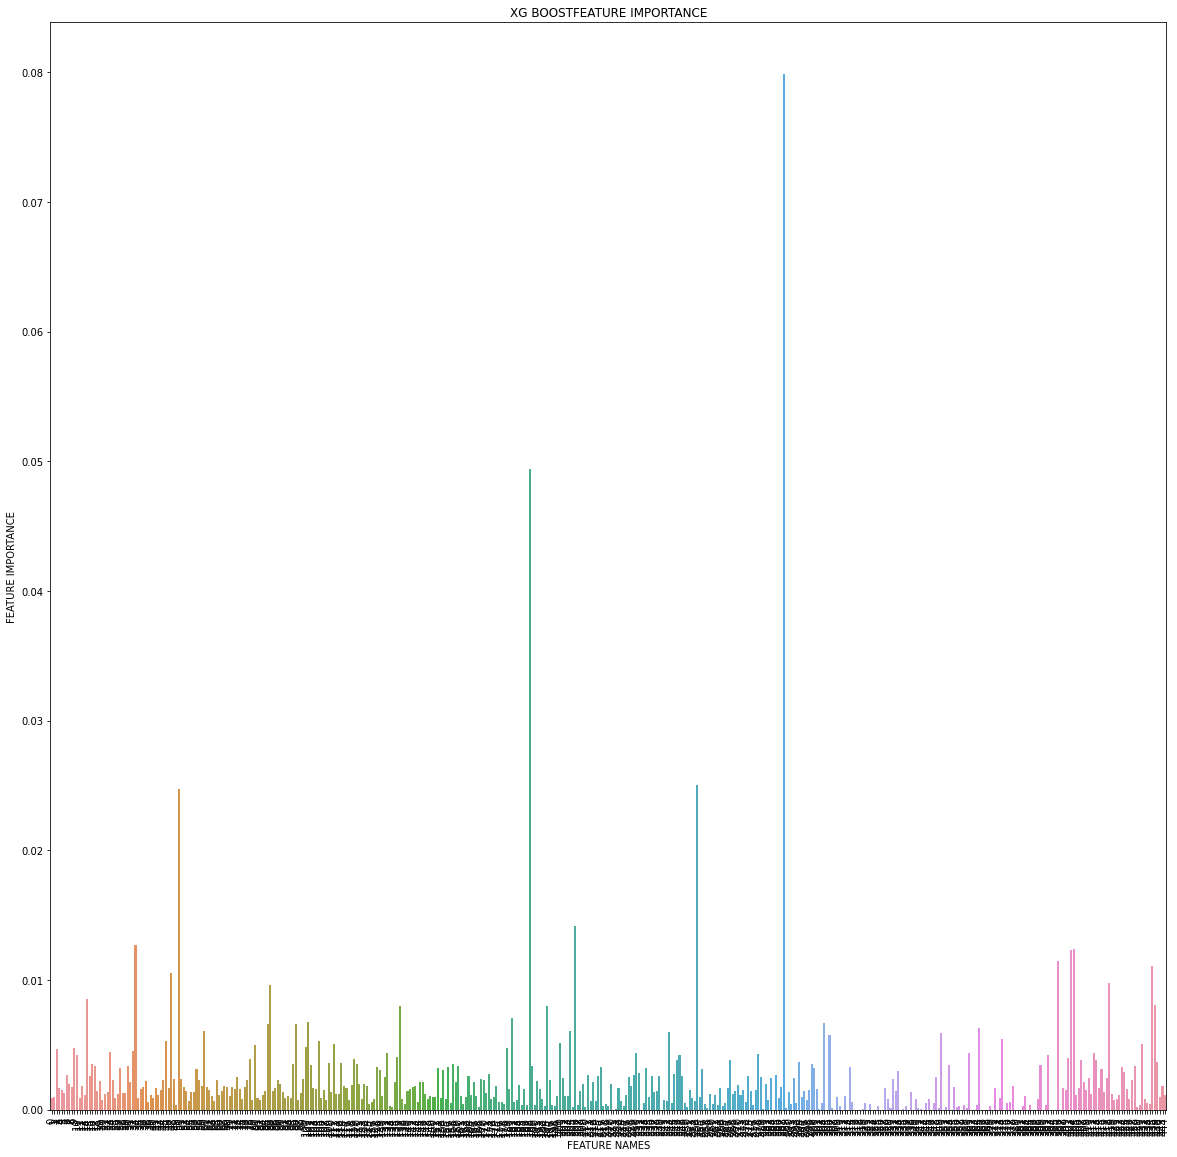

In [ ]:
plot_feature_importance(xg_reg.feature_importances_,x_train_fastText_df.columns,'XG BOOST')

In [ ]:
featureScore(xg_reg.feature_importances_)

Feature: 0, Score: 0.00093
Feature: 1, Score: 0.00097
Feature: 2, Score: 0.00471
Feature: 3, Score: 0.00164
Feature: 4, Score: 0.00151
Feature: 5, Score: 0.00126
Feature: 6, Score: 0.00271
Feature: 7, Score: 0.00196
Feature: 8, Score: 0.00176
Feature: 9, Score: 0.00479
Feature: 10, Score: 0.00423
Feature: 11, Score: 0.00091
Feature: 12, Score: 0.00180
Feature: 13, Score: 0.00114
Feature: 14, Score: 0.00854
Feature: 15, Score: 0.00263
Feature: 16, Score: 0.00349
Feature: 17, Score: 0.00334
Feature: 18, Score: 0.00141
Feature: 19, Score: 0.00220
Feature: 20, Score: 0.00072
Feature: 21, Score: 0.00123
Feature: 22, Score: 0.00135
Feature: 23, Score: 0.00442
Feature: 24, Score: 0.00228
Feature: 25, Score: 0.00094
Feature: 26, Score: 0.00117
Feature: 27, Score: 0.00323
Feature: 28, Score: 0.00132
Feature: 29, Score: 0.00125
Feature: 30, Score: 0.00339
Feature: 31, Score: 0.00217
Feature: 32, Score: 0.00452
Feature: 33, Score: 0.01271
Feature: 34, Score: 0.00089
Feature: 35, Score: 0.00157
Fe

In [ ]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_fastText_df,y_pred_fastText_xgboost)

dict_info['Model'].append('XGboost')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

### Random Forest

In [ ]:
# utils.hyperparameterTuning_RandomForest(x_train_w2v_df,y_train_w2v_df)
rnd_clf = RandomForestRegressor(n_estimators=20, min_samples_split=10, min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=True)
rnd_clf.fit(x_train_fastText_df, y_train_fastText_df)
y_pred_fastText_rnd = rnd_clf.predict(x_test_fastText_df)

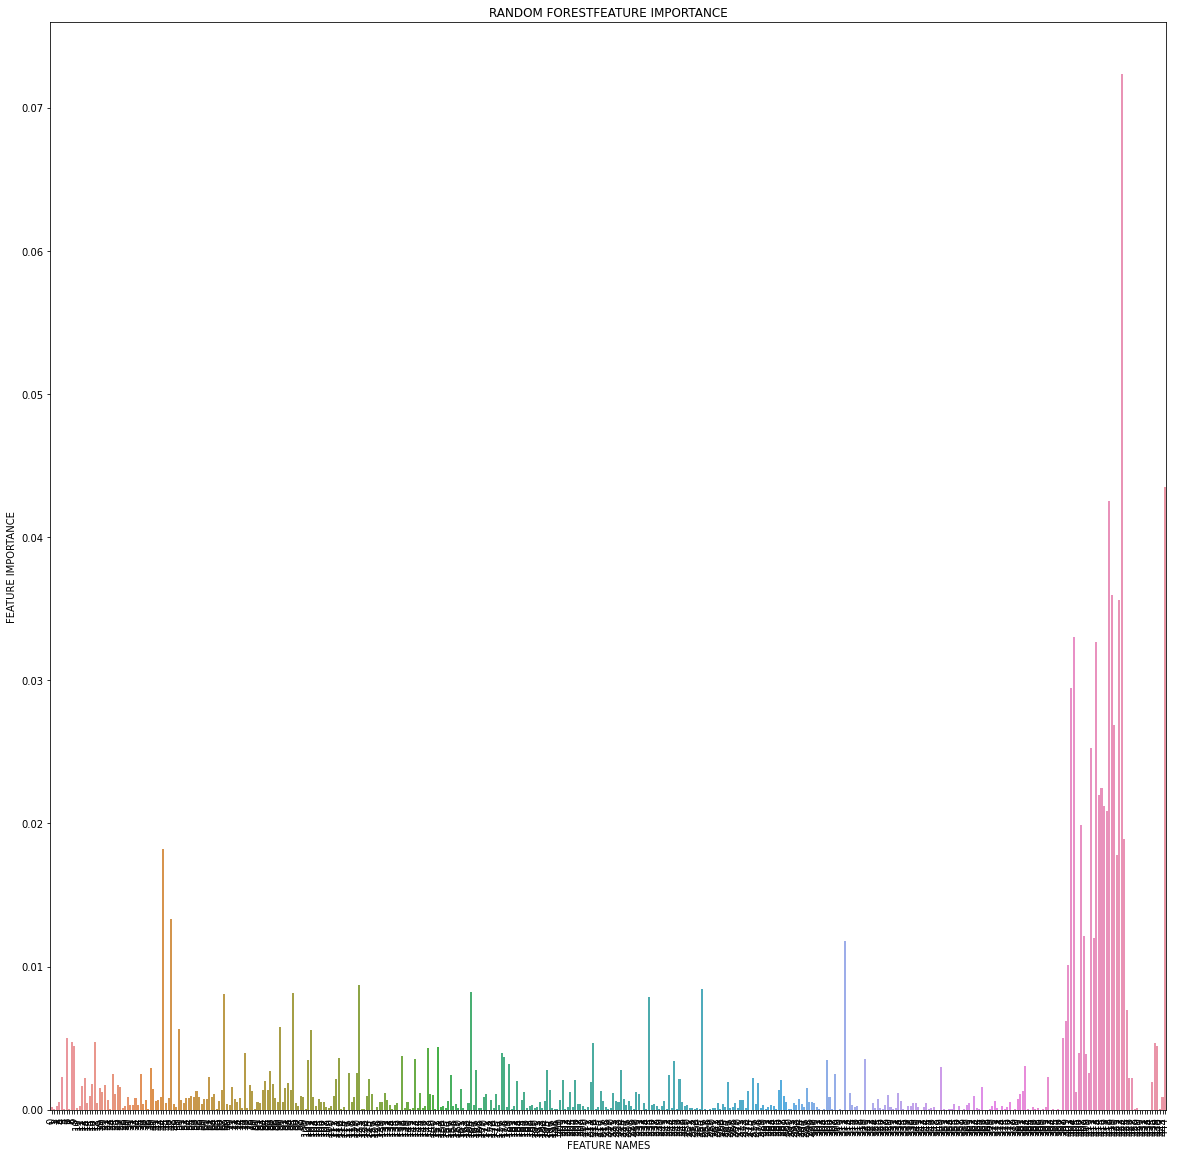

In [ ]:
plot_feature_importance(rnd_clf.feature_importances_,x_train_fastText_df.columns,'RANDOM FOREST')

In [ ]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_fastText_df,y_pred_fastText_rnd)

dict_info['Model'].append('Random Forest')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

### MLP

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp_GS = MLPRegressor(activation='relu',alpha=0.001,hidden_layer_sizes=(50, 50, 50),learning_rate='constant',solver='adam')
mlp_GS.fit(x_train_fastText_df, y_train_fastText_df)
y_pred_fastText_mlp = mlp_GS.predict(x_test_fastText_df)

In [ ]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_fastText_df,y_pred_fastText_mlp)

dict_info['Model'].append('MLP')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

### SVM

In [ ]:
from sklearn.svm import LinearSVR
svr= LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,tol=0.0001, verbose=0)
svr.fit(x_train_fastText_df, y_train_fastText_df)
y_pred_fastText_SVR = svr.predict(x_test_fastText_df)

In [ ]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_fastText_df,y_pred_fastText_SVR)

dict_info['Model'].append('SVR')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

In [ ]:
dfData = pd.DataFrame(dict_info)
dfData

,Model,RMSE,R2,MAE,RMSLE,max_error_
0,Lightgbm,0.007084,0.610846,0.001857,-4.949847,0.194891
1,XGboost,0.006267,0.695508,0.001466,-5.072512,0.174488
2,Random Forest,0.007174,0.600948,0.001761,-4.937287,0.244427
3,MLP,0.009380,0.317820,0.003789,-4.669187,0.305460
4,SVR,0.011823,-0.083904,0.003290,-4.437672,0.363963
